# Lista 3 - Equações Diferenciais Parciais 2

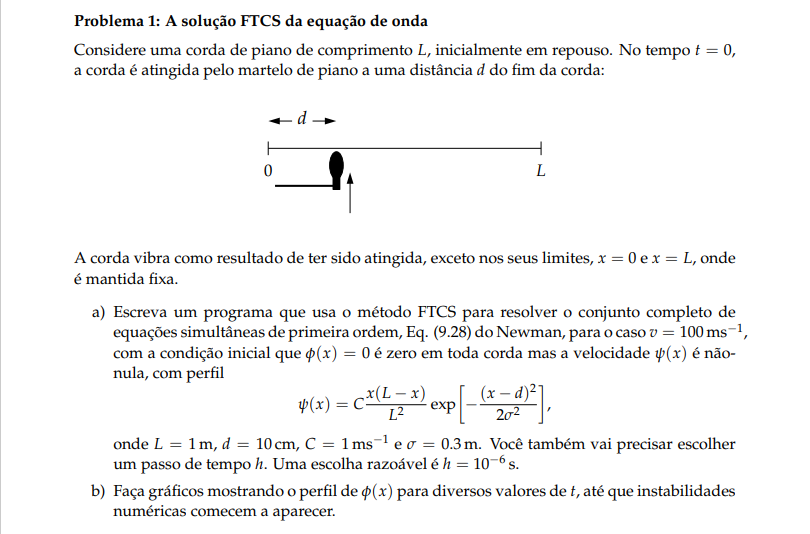

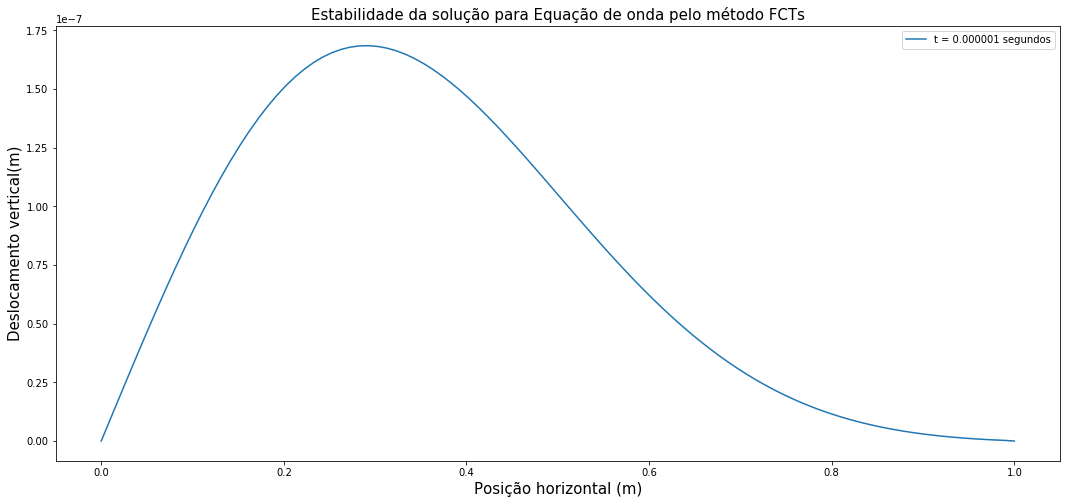

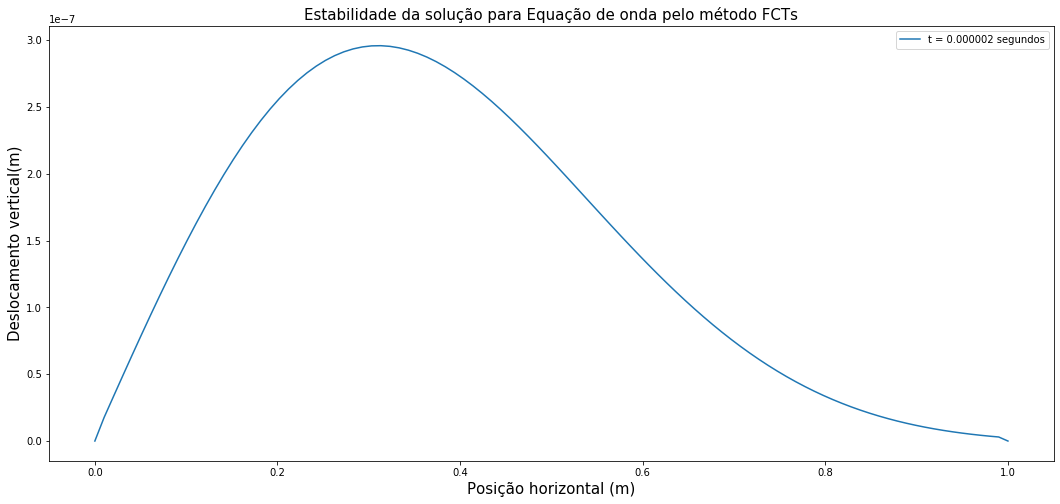

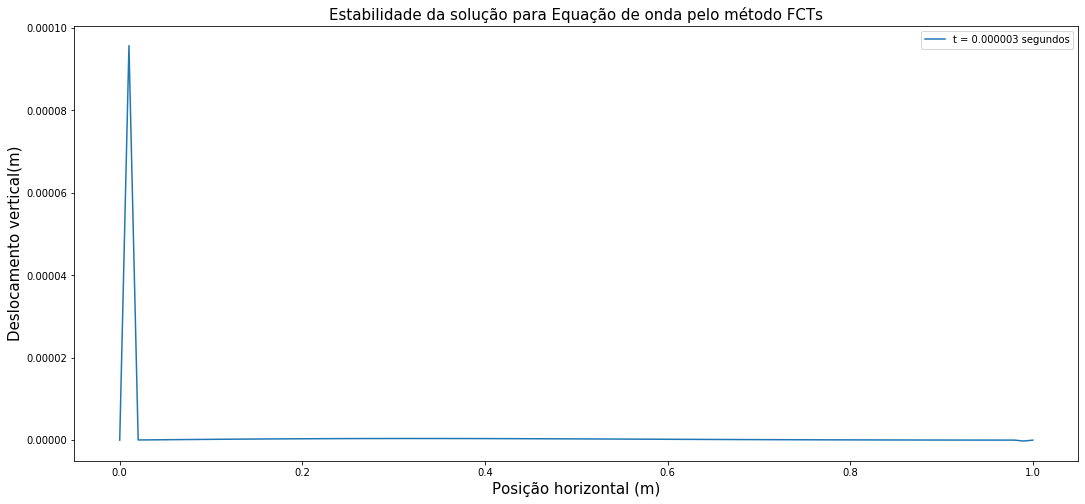

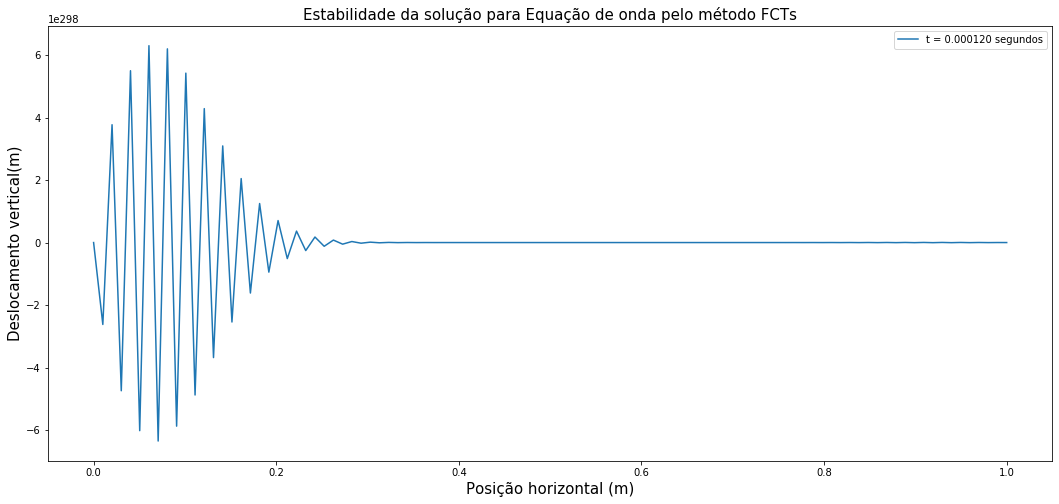

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars


In [11]:
from numpy import ones, linspace, copy,pi,sin,zeros,exp
from pylab import*

L = 1
d = 0.1
C = 1
σ = 0.3
v = 100
N = 100
a = L/N
h = 1e-6
eps = h/1000

Ψ = ones(N,float)
for i in range(100):
    x = L*i/100
    Ψ[i] = (1/L)*C*x*(L-x)*exp(-(1/(2*σ*σ))*(x-d)**2)
Φ = zeros(N,float)

Φnovo = copy(Φ)
Ψnovo = copy(Ψ)

x = linspace(0,L,N)
t1, t2, t3, t4 =  1*h,2*h,3*h,120*h
t = 0.0

while (t<(t4+eps)):
    for i in range(N-1):
        Φnovo[0] = 0
        Φnovo[N-1] = 0
        Φnovo[i] = Φ[i] +h*Ψ[i]
        Ψnovo[i] = Ψ[i] + ((h*v**2)/(a**2))*(Ψ[i-1]+Ψ[i+1]-2*Ψ[i])
    t+=h
    Φ = copy(Φnovo)
    Ψ = copy(Ψnovo)
    if  (abs(t-t1)<=eps) or (abs(t-t2)<=eps) or (abs(t-t3)<=eps) or (abs(t-t4)<=eps):
        
        fig = plt.figure(figsize = (18,8))
        plot(x,Φ,label="t = %f segundos" % t)
        title("Estabilidade da solução para Equação de onda pelo método FCTs",fontsize = 15)
        xlabel("Posição horizontal (m)",fontsize = 15)
        ylabel("Deslocamento vertical(m)",fontsize = 15)       
        legend()
        plt.show()


Podemos ver que a Soluçao é estável nos 2 primeiros gráficos, porém já perde completamente o sentido físico rapidamente nos gráficos seguintes;

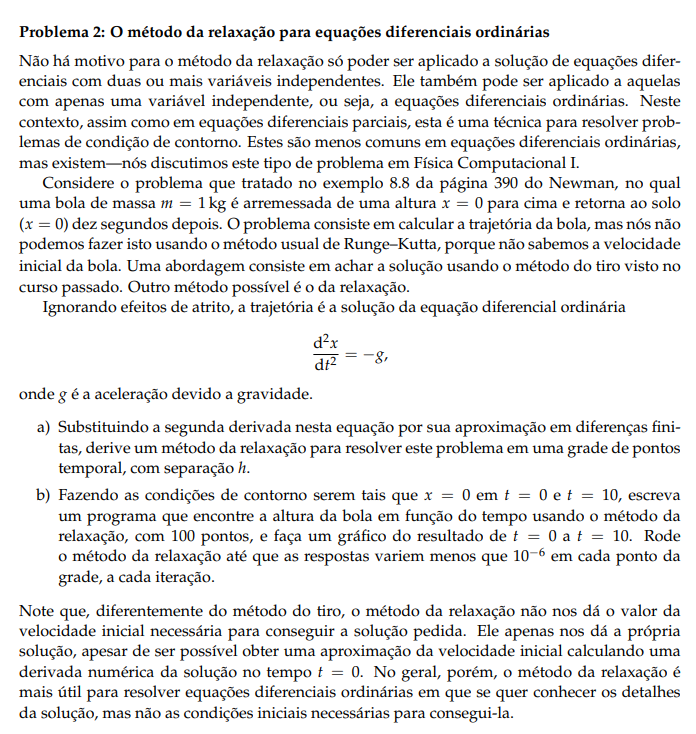

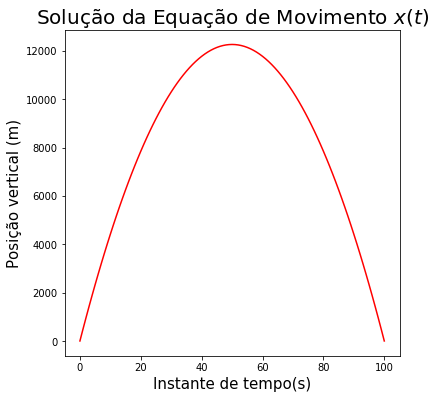

In [12]:

import matplotlib.pyplot as plt
N = 101
g = 9.81
x = zeros(N,float)
x2 = copy(x)

erromax = 10
precisão = 1e-3

while(erromax>precisão):
    erromax=0
    for i in range(1,N-1):
        
            
        x[i]=0.5*(x[i+1] + x[i-1]) + 0.5*g
        erro = abs(x2[i]-x[i])
        if erro>erromax:
            erromax = erro
    x2 = copy(x)
    
fig = plt.figure(figsize=(6,6))
plt.title("Solução da Equação de Movimento $x(t)$",fontsize=20)
ylabel("Posição vertical (m)",fontsize = 15)
xlabel("Instante de tempo(s)",fontsize = 15)
plt.plot(x,'r')

# Questão 5 Prova 1:

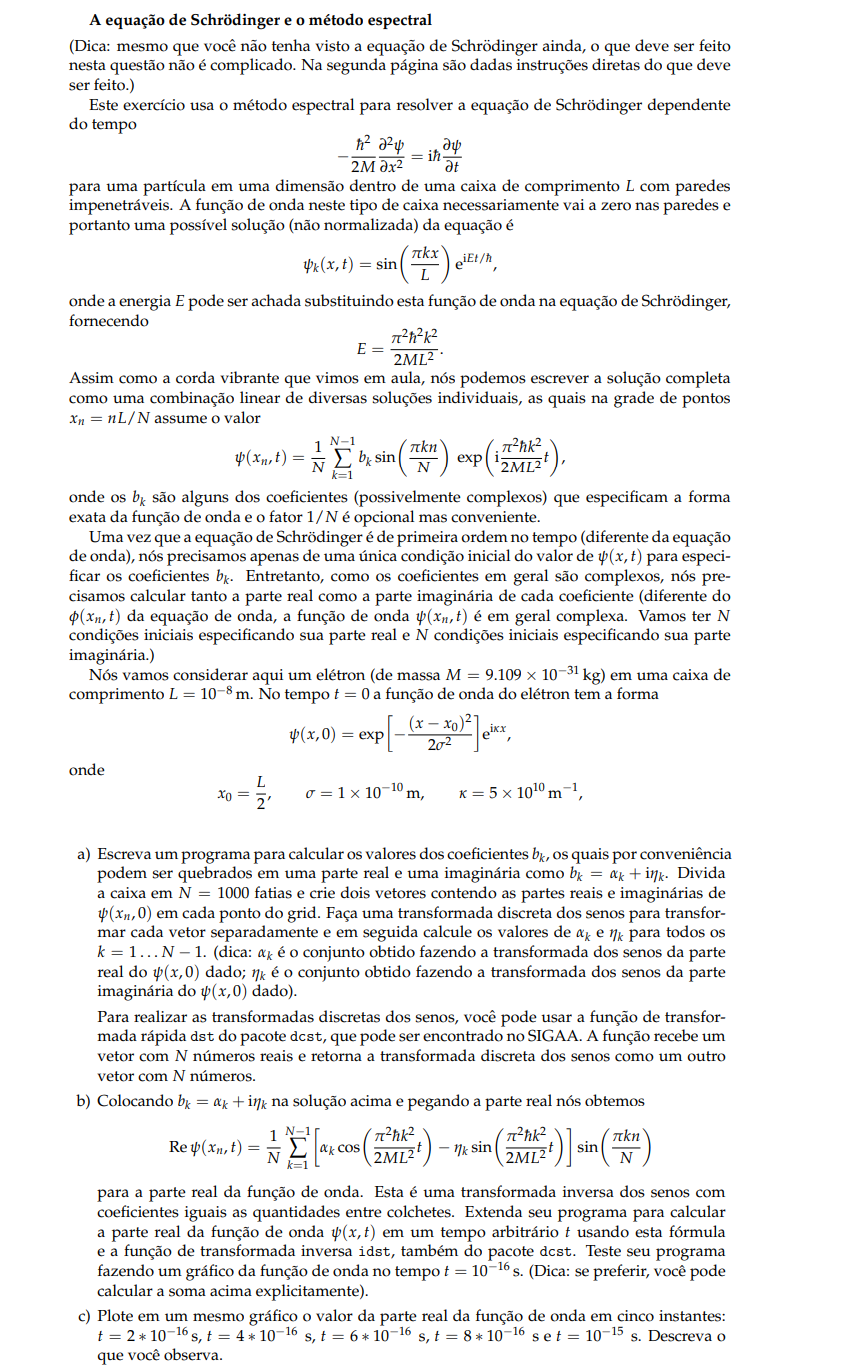

2e-16
4e-16
6e-16
8e-16
1e-15


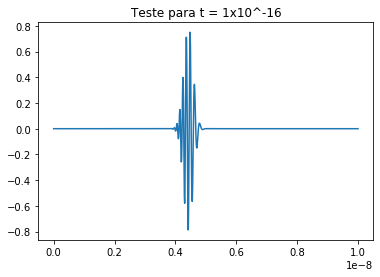

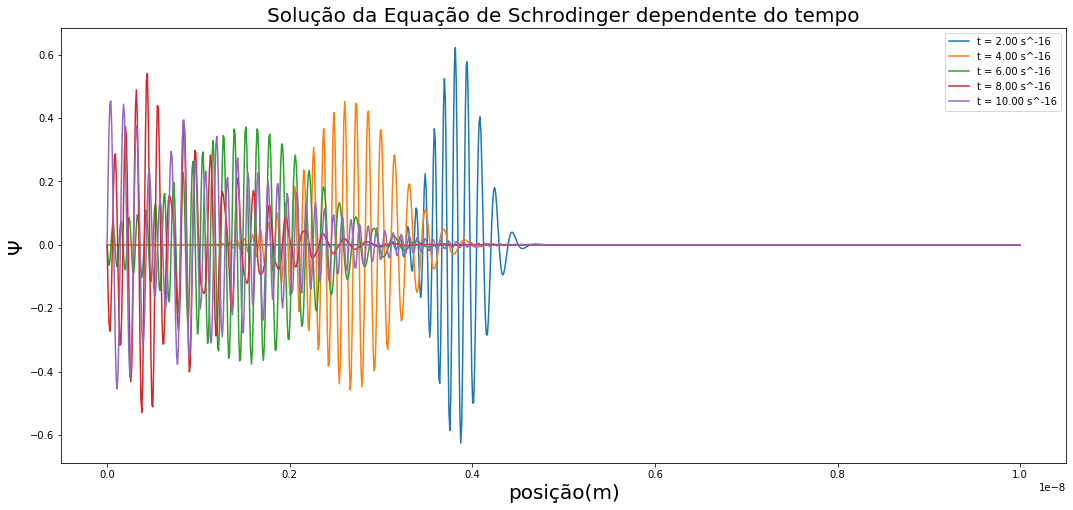

In [39]:
from dcst import dst, idst,rfft
from numpy import cos

M = 9.109e-31
L = 1e-8
xo = 0.5*L
sigma = 1e-10
kappa = 5e10
N = 1000
h=(6.626e-34)/(2*pi)
xn = linspace(0,L,N)
Ψreal = zeros(N,float)
Ψimag = zeros(N,complex)

for i in range(1,N-1):
    x = (L*i)/N
    Ψreal[i] = exp(-(x-xo)**2/(2*sigma**2))*exp(kappa*x*1j).real
    Ψimag[i] = exp(-(x-xo)**2/(2*sigma**2))*exp(kappa*x*1j).imag

alfas=dst(Ψreal)
ns = dst(Ψimag)

def Ψ1(t):
    c = zeros(N,float)
    for k in range (1,N-1):
        c[k] = (alfas[k]*cos(pi*pi*h*k*k*t/(2*M*L*L))-ns[k]*sin(pi*pi*h*k*k*t/(2*M*L*L)))
    return(idst(c))
plt.title("Teste para t = 1x10^-16",fontsize=12)
plot(xn,Ψ1(1e-16))

fig = plt.figure(figsize = (18,8))
for T in range(2,11,2):
    t = T*1e-16
    print(t)
    plot(xn,Ψ1(t),label="t = %.2f s^-16" % T)
    legend()
plt.title("Solução da Equação de Schrodinger dependente do tempo",fontsize=20)
plt.xlabel("posição(m)",fontsize = 20)
plt.ylabel("Ψ",fontsize = 20)
show()


Olhando para cada curva isoladamente, podemos ver que as probabilidades ficam em torno de uma posição e são maiores perto do valor médio, tal como uma distribuição normal. Com o passar do tempo, não só há um aumento na variância dos valores, mas um desvio geral para a região esquerda da caixa, portanto futuramente haverá grandes chances de encontrarmos a partícula próximo de x = 0.
   